In [2]:
import pickle

In [3]:
import joblib
from joblib import dump,load

In [4]:
import seaborn as sns
import plotly.express as px

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import string
import emoji
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline

In [6]:
#Loading Data
df=pd.read_csv('new_dataset.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   content  20001 non-null  object 
 1   notes    0 non-null      float64
 2   label    20001 non-null  int64  
 3   extras   0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 625.2+ KB


In [8]:
df.head()

,content,notes,label,extras
0,Get fucking real dude.,NaN,1,NaN
1,She is as dirty as they come and that crook ...,NaN,1,NaN
2,why did you fuck it up. I could do it all day...,NaN,1,NaN
3,Dude they dont finish enclosing the fucking s...,NaN,1,NaN
4,WTF are you talking about Men? No men thats n...,NaN,1,NaN


In [9]:
#Checking Missing Values
df.isnull().sum()

content        0
notes      20001
label          0
extras     20001
dtype: int64

In [10]:
df.label.value_counts()[1]


7822

In [11]:
df.label.value_counts()[0]

12179

In [12]:
df

,content,notes,label,extras
0,Get fucking real dude.,NaN,1,NaN
1,She is as dirty as they come and that crook ...,NaN,1,NaN
2,why did you fuck it up. I could do it all day...,NaN,1,NaN
3,Dude they dont finish enclosing the fucking s...,NaN,1,NaN
4,WTF are you talking about Men? No men thats n...,NaN,1,NaN
...,...,...,...,...
19996,I dont. But what is complaining about it goi...,NaN,0,NaN
19997,Bahah yeah i&;m totally just gonna&; get pis...,NaN,0,NaN
19998,hahahahaha >:) im evil mwahahahahahahahahaha,NaN,0,NaN
19999,What&;s something unique about Ohio? :),NaN,0,NaN


In [13]:
df.drop(['extras'],axis = 1,inplace = True)
df

,content,notes,label
0,Get fucking real dude.,NaN,1
1,She is as dirty as they come and that crook ...,NaN,1
2,why did you fuck it up. I could do it all day...,NaN,1
3,Dude they dont finish enclosing the fucking s...,NaN,1
4,WTF are you talking about Men? No men thats n...,NaN,1
...,...,...,...
19996,I dont. But what is complaining about it goi...,NaN,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,NaN,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,NaN,0
19999,What&;s something unique about Ohio? :),NaN,0


In [14]:
df.drop(['notes'],axis = 1,inplace = True)
df

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [15]:
df = df.rename(columns={'content': 'tweet'})
df.head

<bound method NDFrame.head of                                                    tweet  label
0                                 Get fucking real dude.      1
1       She is as dirty as they come  and that crook ...      1
2       why did you fuck it up. I could do it all day...      1
3       Dude they dont finish enclosing the fucking s...      1
4       WTF are you talking about Men? No men thats n...      1
...                                                  ...    ...
19996    I dont. But what is complaining about it goi...      0
19997   Bahah  yeah i&;m totally just gonna&; get pis...      0
19998       hahahahaha >:) im evil mwahahahahahahahahaha      0
19999            What&;s something unique about Ohio? :)      0
20000              Who is the biggest gossiper you know?      0

[20001 rows x 2 columns]>

In [16]:
df.shape 

(20001, 2)

<Axes: >

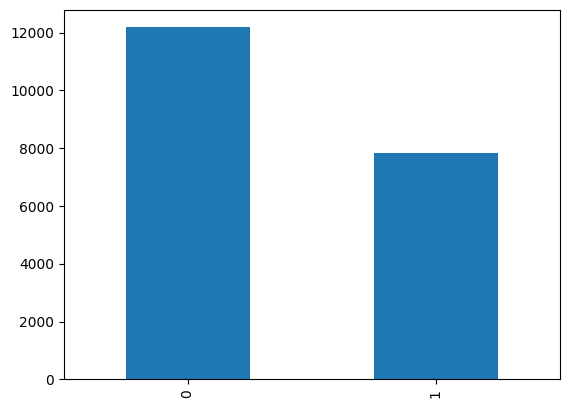

In [17]:
df['label'].value_counts().sort_index().plot.bar()

In [18]:
print("Non-Cyber trolling: ", df.label.value_counts()[0]/len(df.label)*100,"%")
print("Cyber trolling: ", df.label.value_counts()[1]/len(df.label)*100,"%")

Non-Cyber trolling:  60.89195540222989 %
Cyber trolling:  39.10804459777012 %


In [19]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
#Preprocessing of Text

#Function to Remove Emojis
def strip_emoji(tweet):
    return emoji.replace_emoji(tweet,replace="")

In [21]:
#Fucntion to Convert text to lowercase, remove (/r, /n characters), URLs, non-utf characters, Numbers, punctuations,stopwords
def strip_all_entities(tweet): 
    tweet = tweet.replace('\r', '').replace('\n', ' ').lower()
    tweet = re.sub(r"(?:\@|https?\://)\S+", "", tweet)
    tweet = re.sub(r'[^\x00-\x7f]',r'', tweet)
    tweet = re.sub(r'(.)1+', r'1', tweet)
    tweet = re.sub('[0-9]+', '', tweet)
    stopchars= string.punctuation
    table = str.maketrans('', '', stopchars)
    tweet = tweet.translate(table)
    tweet = [word for word in tweet.split() if word not in stop_words]
    tweet = ' '.join(tweet)
    return tweet

In [22]:
#Function to remove contractions
def decontract(tweet):
    tweet = re.sub(r"can\'t", "can not", tweet)
    tweet = re.sub(r"n\'t", " not", tweet)
    tweet = re.sub(r"\'re", " are", tweet)
    tweet = re.sub(r"\'s", " is", tweet)
    tweet = re.sub(r"\'d", " would", tweet)
    tweet = re.sub(r"\'ll", " will", tweet)
    tweet = re.sub(r"\'t", " not", tweet)
    tweet = re.sub(r"\'ve", " have", tweet)
    tweet = re.sub(r"\'m", " am", tweet)
    return tweet

In [23]:
#Function to Clean Hashtags
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))
    return new_tweet2

In [24]:
#Function to Filter Special Characters such as $, &
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

In [25]:
#Function to remove mutiple sequence spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

In [26]:
#Function to apply stemming to words
#def stemmer(tweet):
    #tokenized = nltk.word_tokenize(tweet)
    #ps = PorterStemmer()
    #return ' '.join([ps.stem(words) for words in tokenized])

In [27]:
#Function to apply lemmatization to words
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

In [28]:
#Function to Preprocess the text by applying all above functions
def preprocess(tweet):
    tweet = strip_emoji(tweet)
    tweet = decontract(tweet)
    tweet = strip_all_entities(tweet)
    tweet = clean_hashtags(tweet)
    tweet = filter_chars(tweet)
    tweet = remove_mult_spaces(tweet)
    #tweet = stemmer(tweet)
    tweet = lemmatize(tweet)
    return tweet

In [29]:
df['cleaned_tweet'] = df['tweet'].apply(preprocess)
df.head()

,tweet,label,cleaned_tweet
0,Get fucking real dude.,1,get fucking real dude
1,She is as dirty as they come and that crook ...,1,dirty come crook rengel dems fucking corrupt j...
2,why did you fuck it up. I could do it all day...,1,fuck could day let hour ping later sched writi...
3,Dude they dont finish enclosing the fucking s...,1,dude dont finish enclosing fucking shower hate...
4,WTF are you talking about Men? No men thats n...,1,wtf talking men men thats menage gay


In [30]:
#Cleaned text added


#Dealing with Duplicates
df["cleaned_tweet"].duplicated().sum()

5953

In [31]:
df.drop_duplicates("cleaned_tweet", inplace=True)
df.head()

,tweet,label,cleaned_tweet
0,Get fucking real dude.,1,get fucking real dude
1,She is as dirty as they come and that crook ...,1,dirty come crook rengel dems fucking corrupt j...
2,why did you fuck it up. I could do it all day...,1,fuck could day let hour ping later sched writi...
3,Dude they dont finish enclosing the fucking s...,1,dude dont finish enclosing fucking shower hate...
4,WTF are you talking about Men? No men thats n...,1,wtf talking men men thats menage gay


In [32]:
#Duplicates removed


#Tokenization
df['tweet_list'] = df['cleaned_tweet'].apply(word_tokenize)
df.head()

,tweet,label,cleaned_tweet,tweet_list
0,Get fucking real dude.,1,get fucking real dude,"[get, fucking, real, dude]"
1,She is as dirty as they come and that crook ...,1,dirty come crook rengel dems fucking corrupt j...,"[dirty, come, crook, rengel, dems, fucking, co..."
2,why did you fuck it up. I could do it all day...,1,fuck could day let hour ping later sched writi...,"[fuck, could, day, let, hour, ping, later, sch..."
3,Dude they dont finish enclosing the fucking s...,1,dude dont finish enclosing fucking shower hate...,"[dude, dont, finish, enclosing, fucking, showe..."
4,WTF are you talking about Men? No men thats n...,1,wtf talking men men thats menage gay,"[wtf, talking, men, men, thats, menage, gay]"


In [33]:
#Checking length of various tweet texts

text_len = []
for tweet in df.tweet_list:
    tweet_len = len(tweet)
    text_len.append(tweet_len)
df['text_len'] = text_len

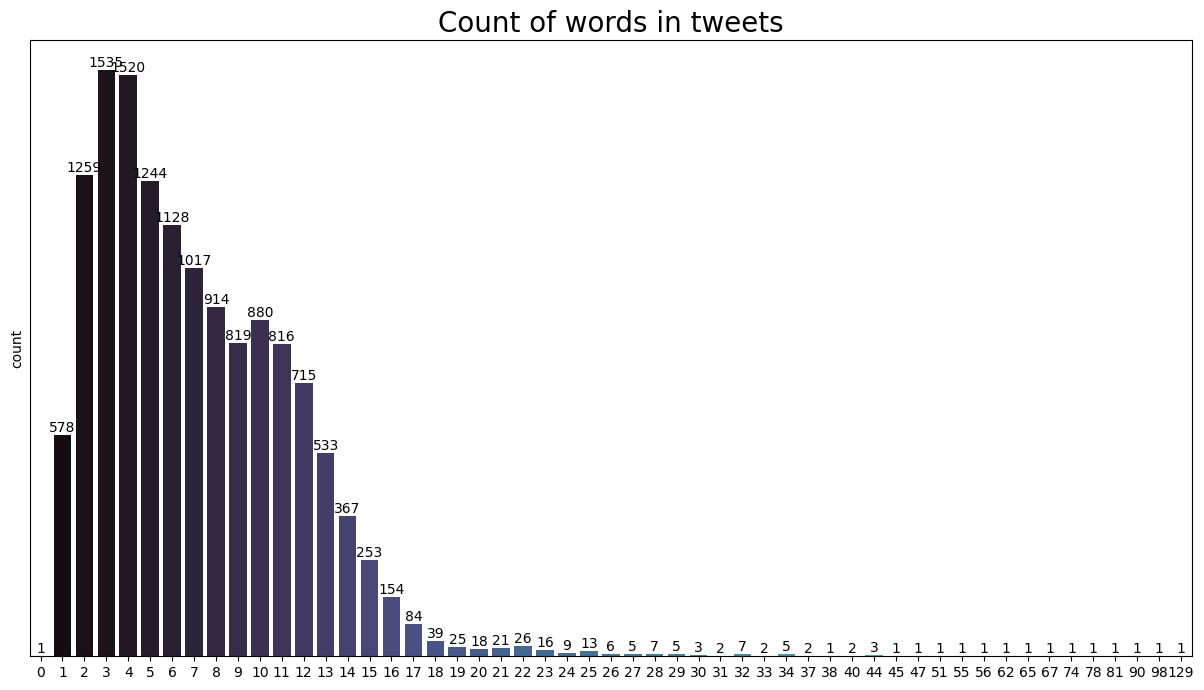

In [34]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='text_len', data=df, palette='mako')
plt.title('Count of words in tweets', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [35]:
df = df[df['text_len']!=0]


In [36]:
df.shape

(14047, 5)

In [37]:
df.head()

,tweet,label,cleaned_tweet,tweet_list,text_len
0,Get fucking real dude.,1,get fucking real dude,"[get, fucking, real, dude]",4
1,She is as dirty as they come and that crook ...,1,dirty come crook rengel dems fucking corrupt j...,"[dirty, come, crook, rengel, dems, fucking, co...",12
2,why did you fuck it up. I could do it all day...,1,fuck could day let hour ping later sched writi...,"[fuck, could, day, let, hour, ping, later, sch...",10
3,Dude they dont finish enclosing the fucking s...,1,dude dont finish enclosing fucking shower hate...,"[dude, dont, finish, enclosing, fucking, showe...",15
4,WTF are you talking about Men? No men thats n...,1,wtf talking men men thats menage gay,"[wtf, talking, men, men, thats, menage, gay]",7


In [38]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.cleaned_tweet	.tolist())
dump(tfIdfVectorizer,'vectorizer.joblib')
print(tfIdf)

  (0, 4056)	0.5543079547636945
  (0, 11431)	0.6054631992930344
  (0, 5297)	0.41972132390412764
  (0, 5533)	0.38728673595631935
  (1, 8113)	0.13841818651133903
  (1, 8310)	0.19762204017170748
  (1, 11678)	0.3435498333573337
  (1, 8523)	0.17827027172843393
  (1, 7462)	0.2760042032093363
  (1, 2956)	0.36317829041776595
  (1, 3519)	0.37875827328027506
  (1, 11648)	0.37875827328027506
  (1, 3121)	0.37875827328027506
  (1, 2702)	0.20760013130575025
  (1, 3720)	0.29028152011229086
  (1, 5297)	0.16176434127358597
  (2, 1634)	0.30019430120115215
  (2, 15779)	0.3503668495840928
  (2, 12169)	0.4571573929741936
  (2, 7918)	0.32183543552946253
  (2, 10578)	0.42501023616051736
  (2, 6656)	0.298648206576511
  (2, 8045)	0.2601183706730612
  (2, 3360)	0.2229524253937241
  (2, 2976)	0.23123019683068594
  :	:
  (14043, 9655)	0.38921337577167997
  (14043, 1031)	0.35303305516935757
  (14043, 8871)	0.3344746638216851
  (14043, 9213)	0.35303305516935757
  (14043, 15886)	0.19007053680536296
  (14043, 5966)	0.

In [39]:
X=tfIdf.toarray()
y = np.array(df.label.tolist())
#Spltting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11237, 16136)
(11237,)
(2810, 16136)
(2810,)


In [40]:
#Training data biasness
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9050 2187]]


In [41]:
#Test Data
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [2300  510]]


In [42]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9050 2187]]


In [43]:
rfc = RandomForestClassifier(verbose=True) #uses randomized decision trees
epochs = 5
for i in range(epochs):
    # Fit the model to the training data
    rfc.fit(X_train, y_train)
    # Evaluate the model on the test data
    score = rfc.score(X_test, y_test)
    # Print the current epoch and test score
    print(f'Epoch {i+1}/{epochs} - Accuracy: {score:.2f}')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 22.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


Epoch 1/5 - Accuracy: 0.82


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 12.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


Epoch 2/5 - Accuracy: 0.82


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 12.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


Epoch 3/5 - Accuracy: 0.82


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 11.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


Epoch 4/5 - Accuracy: 0.82


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 5/5 - Accuracy: 0.82


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


In [44]:
gnb = GaussianNB()
gnbmodel = gnb.fit(X_over, y_over.astype('int'))
y_pred = gnbmodel.predict(X_test)
print ("Score:", gnbmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

NameError: name 'X_over' is not defined

In [ ]:
lgr = LogisticRegression()
lgr.fit(X_over, y_over)
y_pred = lgr.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.7506234413965087
Confusion Matrix: 
 [[1859  439]
 [ 261  248]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

dtc = DecisionTreeClassifier()
dtc.fit(X_over, y_over)
y_pred = dtc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.7420733879586747
Confusion Matrix: 
 [[1873  425]
 [ 299  210]]


In [ ]:
#Ensemble methods from here 
abc = AdaBoostClassifier() 
abc.fit(X_over, y_over)
y_pred = abc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.6822230138938369
Confusion Matrix: 
 [[1603  695]
 [ 197  312]]


In [ ]:
rfc = RandomForestClassifier(verbose=True) #uses randomized decision trees
rfcmodel = rfc.fit(X_over, y_over)
y_pred = rfc.predict(X_test)
print ("Accuracy:", rfcmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


Accuracy: 0.7915924474527966
Confusion Matrix: 
 [[2057  241]
 [ 344  165]]


In [ ]:
pickle.dump(tfIdfVectorizer,open('vectorizers.pkl','wb'))
pickle.dump(rfc,open('models.pkl','wb'))

In [ ]:
joblib.dump(rfc,'modell.joblib')

['modell.joblib']